In [1]:
#Data Cleaning
import pandas as pd
import os
import numpy as np

#Data is saved on diffrent CSVs for each city
#To make things easier, we can combine the data into one dataframe
dfs = []
for file in os.listdir("data"):
    df = pd.read_csv(os.path.join("data", file))
    df["City"] = file.replace(".csv", "")
    dfs.append(df)
df = pd.concat(dfs)

#As documented on kaggle, 9 implies that this information was not found for a home.
#Therefore we replaced all 9s with np.nan as is standard for empty values

temp = df["No. of Bedrooms"].copy()
df = df.applymap(lambda x: (np.nan if x == 9  else  x))
df["No. of Bedrooms"] = temp
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,3340,JP Nagar Phase 1,4,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
3,8358000,1675,Doddanekundi,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
4,6845000,1670,Kengeri,3,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714,14500000,1180,Mira Road East,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
7715,14500000,530,Naigaon East,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
7716,4100000,700,Shirgaon,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
7717,2750000,995,Mira Road East,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai


In [2]:
cleaned_df = df[~df.isnull().any(axis=1)]
cleaned_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,3340,JP Nagar Phase 1,4,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
3,8358000,1675,Doddanekundi,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
4,6845000,1670,Kengeri,3,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,62000000,1450,Worli,3,0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mumbai
1394,2500000,540,Virar East,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai
1395,19000000,1267,Belapur,3,1,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai
1396,14900000,1245,Airoli,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai


Below, I one-hot encode the location and city columns

In [3]:
cleaned_df = pd.get_dummies(cleaned_df,columns=["City"]) #"Location"
cleaned_df = cleaned_df.drop(["Location"], axis=1)
##

In [4]:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df.drop("Price", axis=1), 
    cleaned_df["Price"], 
    test_size=0.2, 
    random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, 
    y_train, 
    test_size=0.2, 
    random_state=42
)


In [5]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
reg.score(X_test,y_test)

0.5180830031213732

## Neural Network

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch

c:\Users\seanh\.conda\envs\COGS118ASP23\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\seanh\.conda\envs\COGS118ASP23\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [7]:
cleaned_df.shape[0]

10093

In [8]:
mean = cleaned_df["Price"].mean()
std = cleaned_df["Price"].std(ddof=0)
cleaned_df = cleaned_df[np.abs((cleaned_df["Price"] - mean)/std) < 5]

In [9]:
y_2, bins = pd.cut(cleaned_df["Price"], bins=10, retbins=True)
bins

y, bins = pd.cut(cleaned_df["Price"], bins=bins, retbins=True, labels=range(10))


y, y_2

(0       3
 1       0
 2       0
 3       0
 4       0
        ..
 1393    8
 1394    0
 1395    2
 1396    1
 1397    1
 Name: Price, Length: 10050, dtype: category
 Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9],
 0       (24110000.0, 31480000.0]
 1         (1926300.0, 9370000.0]
 2         (1926300.0, 9370000.0]
 3         (1926300.0, 9370000.0]
 4         (1926300.0, 9370000.0]
                   ...           
 1393    (60960000.0, 68330000.0]
 1394      (1926300.0, 9370000.0]
 1395    (16740000.0, 24110000.0]
 1396     (9370000.0, 16740000.0]
 1397     (9370000.0, 16740000.0]
 Name: Price, Length: 10050, dtype: category
 Categories (10, interval[float64, right]): [(1926300.0, 9370000.0] < (9370000.0, 16740000.0] < (16740000.0, 24110000.0] < (24110000.0, 31480000.0] ... (46220000.0, 53590000.0] < (53590000.0, 60960000.0] < (60960000.0, 68330000.0] < (68330000.0, 75700000.0]])

In [10]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class dataframeDataset(Dataset):
    def __init__(self, X, y, bins=None):
        self.X = X
        if (bins is not None):
            zero_class = y[y <= bins[0]]
            if (len(zero_class) > 0):
                zero_class = zero_class.index

            nine_class = y[y > bins[-1]]
            if (len(nine_class) > 0):
                nine_class = nine_class.index

            self.Y, self.bins = pd.cut(y, bins=bins, retbins=True, labels=range(10))


            if (len(zero_class) > 0):
                self.Y.loc[zero_class] = 0

            if (len(nine_class) > 0):
                #print(self.Y.loc[nine_class])
                self.Y.loc[nine_class] = 9
        else:
            self.Y, self.bins = pd.cut(y, bins=10, retbins=True, labels=range(10))

        #print(self.Y.unique())

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):


        #print(self.Y.iloc[idx], type(self.Y.iloc[idx]))
        y = torch.zeros(10)
        y[self.Y.iloc[idx]] = 1

        return (
            torch.Tensor(self.X.iloc[idx]), 
            torch.Tensor(y)
        )
    
    def get_bins(self):
        return self.bins

dataframeDataset(X_train, y_train) 

In [11]:
from torch.utils.data import DataLoader
train_dataset = dataframeDataset(X_train, y_train) 
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

bins = train_dataset.get_bins()

print("===================")
test_dataset = dataframeDataset(X_test, y_test, bins=bins) 
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

valid_dataset = dataframeDataset(X_valid, y_valid, bins=bins) 
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

In [12]:
X_train.shape[1]

44

In [13]:
model_name = "skip-3_non-skip-1_sigmod_attempt_2"

class NNRegressor_V1(nn.Module):
    def __init__(self, out_classes = 10):
        super().__init__()
        self.flatten = nn.Flatten()
        self.input = nn.Linear(44, 32)
        self.hidden = nn.Linear(32, 32)
        self.output = nn.Linear(32, out_classes)
        self.relu = nn.ReLU()
        self.sigmod = nn.Sigmoid()


    def skip_connection(self, x):
        og_x = x
        x = self.hidden(x)
        x = self.relu(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = x + og_x
        return x


    def forward(self, x):
        x = self.input(x)
        x = self.skip_connection(x)
        x = self.skip_connection(x)
        x = self.skip_connection(x)
        # x = self.skip_connection(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmod(x)
        return x
    
model = NNRegressor_V1()

In [14]:
from sklearn.metrics import r2_score

def train_loop(dataloader, valid_dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    losses = []
    correctness = []
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            losses.append(loss)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    model.eval()
    test_loss, correct = 0, 0
    num_batches = len(valid_dataloader)
    count = 0
    with torch.no_grad():
        for X, y in dataloader:
                pred = model(X)
                loss = loss_fn(pred, y)



                pred = torch.argmax(pred)
                y = torch.argmax(y)
                correct += float(torch.sum(pred == y))
                count += 1
                test_loss += loss.item()

    print(count, num_batches)

    test_loss /= count
    correct /= count
    print(f"Test Error: Avg loss: {test_loss:>8f} Avg correct {correct:>8f} \n")
    
    return losses, correct


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    count = 0
    with torch.no_grad():
        for X, y in dataloader:
            
            count += 1
            pred = model(X)
            loss = loss_fn(pred, y)
            test_loss += loss.item()

            pred = torch.argmax(pred)
            y = torch.argmax(y)
            correct += float(torch.sum(pred == y))
            

    print(count, num_batches, size)
    test_loss /= num_batches
    correct /= num_batches
    print(f"Test Error: Avg loss: {test_loss:>8f} Avg correct {correct:>8f} \n")

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.001)

epochs = 30

losses = []
correctness =[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    loss, correct = train_loop(train_dataloader, valid_dataloader, model, loss_fn, optimizer)
    losses.extend(loss)
    correctness.append(correct)
print("Done!") 


Epoch 1
-------------------------------
loss: 1.993100  [   32/ 6459]
loss: 1.718814  [ 3232/ 6459]
loss: 1.719303  [ 6432/ 6459]
202 51
Test Error: Avg loss: 1.740646 Avg correct 0.980198 

Epoch 2
-------------------------------
loss: 1.718777  [   32/ 6459]
loss: 1.749781  [ 3232/ 6459]
loss: 1.718395  [ 6432/ 6459]
202 51
Test Error: Avg loss: 1.740501 Avg correct 0.980198 

Epoch 3
-------------------------------
loss: 1.749873  [   32/ 6459]
loss: 1.749635  [ 3232/ 6459]
loss: 1.718737  [ 6432/ 6459]
202 51
Test Error: Avg loss: 1.740440 Avg correct 0.965347 

Epoch 4
-------------------------------
loss: 1.718376  [   32/ 6459]
loss: 1.718369  [ 3232/ 6459]
loss: 1.718341  [ 6432/ 6459]
202 51
Test Error: Avg loss: 1.740433 Avg correct 0.980198 

Epoch 5
-------------------------------
loss: 1.749735  [   32/ 6459]
loss: 1.843366  [ 3232/ 6459]
loss: 1.718381  [ 6432/ 6459]
202 51
Test Error: Avg loss: 1.740379 Avg correct 0.985149 

Epoch 6
-------------------------------
loss:

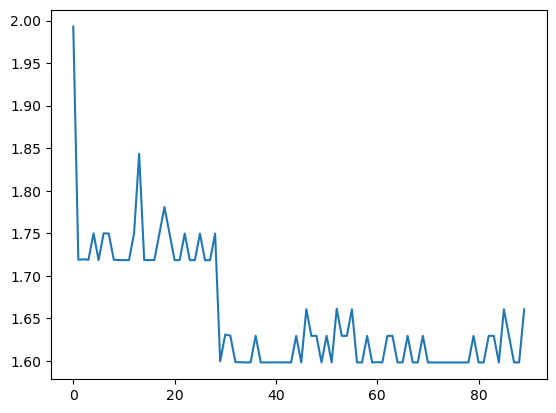

In [16]:
plt.plot(losses)

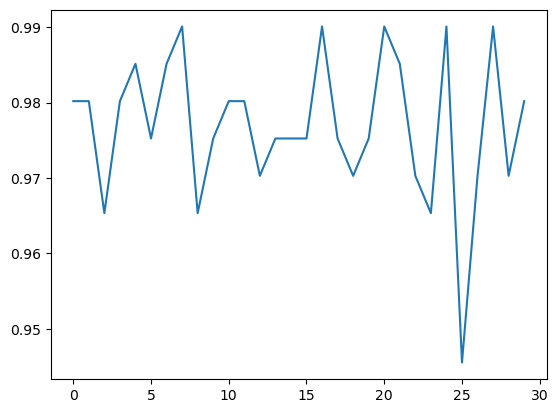

In [17]:
plt.plot(correctness)

In [18]:
#test_loop(test_dataloader, model, loss_fn)

In [19]:
#input()

record = pd.DataFrame(correctness).T
record = record.rename({0:model_name})
torch.save(model.state_dict(), f"./models/{model_name}.pt")
record.to_csv("temp.csv")

In [20]:
past_record = pd.read_csv("correctness_scores.csv",index_col=0)
full_record = pd.concat([past_record, pd.read_csv("temp.csv",index_col=0)], axis=0)

<Axes: >

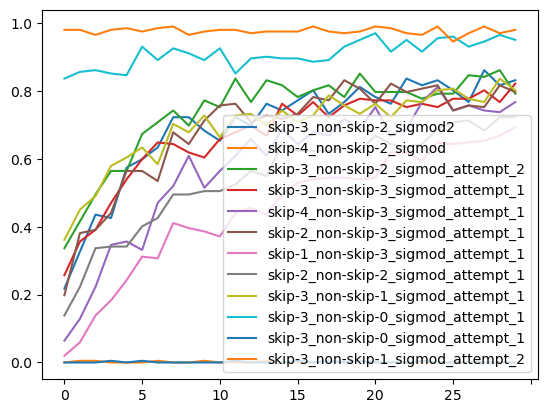

In [21]:
full_record.T.plot(kind="line")

In [22]:
full_record.to_csv("correctness_scores.csv")

In [23]:
full_record

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
skip-3_non-skip-2_sigmod2,0.217822,0.326733,0.435644,0.425743,0.574257,0.599010,0.633663,0.722772,0.722772,0.683168,...,0.782178,0.762376,0.836634,0.816832,0.831683,0.801980,0.767327,0.861386,0.816832,0.831683
skip-4_non-skip-2_sigmod,0.000000,0.004950,0.004950,0.000000,0.000000,0.000000,0.004950,0.000000,0.000000,0.004950,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skip-3_non-skip-2_sigmod_attempt_2,0.336634,0.415842,0.495050,0.564356,0.564356,0.673267,0.707921,0.742574,0.698020,0.772277,...,0.797030,0.797030,0.797030,0.777228,0.792079,0.792079,0.846535,0.841584,0.861386,0.792079
skip-3_non-skip-3_sigmod_attempt_1,0.257426,0.356436,0.391089,0.470297,0.539604,0.599010,0.648515,0.643564,0.618812,0.603960,...,0.772277,0.772277,0.752475,0.762376,0.752475,0.777228,0.777228,0.801980,0.767327,0.821782
skip-4_non-skip-3_sigmod_attempt_1,0.064356,0.128713,0.222772,0.346535,0.356436,0.331683,0.470297,0.519802,0.608911,0.514851,...,0.752475,0.668317,0.688119,0.767327,0.811881,0.742574,0.757426,0.742574,0.737624,0.767327
skip-2_non-skip-3_sigmod_attempt_1,0.198020,0.381188,0.391089,0.440594,0.564356,0.564356,0.534653,0.678218,0.643564,0.712871,...,0.762376,0.821782,0.797030,0.806931,0.816832,0.742574,0.757426,0.752475,0.816832,0.797030
skip-1_non-skip-3_sigmod_attempt_1,0.019802,0.059406,0.138614,0.183168,0.242574,0.311881,0.306931,0.410891,0.396040,0.386139,...,0.544554,0.618812,0.618812,0.594059,0.648515,0.643564,0.648515,0.653465,0.668317,0.693069
skip-2_non-skip-2_sigmod_attempt_1,0.138614,0.222772,0.336634,0.341584,0.341584,0.400990,0.425743,0.495050,0.495050,0.504950,...,0.668317,0.643564,0.633663,0.643564,0.688119,0.707921,0.712871,0.683168,0.722772,0.722772
skip-3_non-skip-1_sigmod_attempt_1,0.361386,0.450495,0.490099,0.579208,0.603960,0.633663,0.584158,0.702970,0.678218,0.727723,...,0.762376,0.722772,0.772277,0.767327,0.801980,0.806931,0.777228,0.767327,0.836634,0.801980
skip-3_non-skip-0_sigmod_attempt_1,0.836634,0.856436,0.861386,0.851485,0.846535,0.930693,0.891089,0.925743,0.910891,0.891089,...,0.970297,0.915842,0.950495,0.915842,0.955446,0.960396,0.930693,0.945545,0.965347,0.950495
